In [1]:
import gc
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)
print(np.__version__)

2.15.0
1.23.5


In [2]:
from tensorflow.keras import layers, models

def identity_block(x, filters, kernel_size=3):
    filters1, filters2, filters3 = filters

    x_shortcut = x

    x = layers.Conv2D(filters1, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    x_shortcut = layers.Conv2D(filters3, (1, 1), padding='valid')(x_shortcut)
    x_shortcut = layers.BatchNormalization()(x_shortcut)

    x = layers.add([x, x_shortcut])
    x = layers.Activation('relu')(x)

    return x

def convolutional_block(x, filters, kernel_size=3, strides=(2, 2)):
    filters1, filters2, filters3 = filters

    x_shortcut = x

    x = layers.Conv2D(filters1, (1, 1), strides=strides, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    x_shortcut = layers.Conv2D(filters3, (1, 1), strides=strides, padding='valid')(x_shortcut)
    x_shortcut = layers.BatchNormalization()(x_shortcut)

    x = layers.add([x, x_shortcut])
    x = layers.Activation('relu')(x)

    return x

def build_resnet(input_shape=(32, 32, 3), is_50=True):
    inputs = layers.Input(shape=input_shape)

    if is_50:
        filters = [64, 64, 256]
        x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

        for _ in range(3):
            x = convolutional_block(x, filters)
            filters = [64, 64, 256]

        filters = [128, 128, 512]
        for _ in range(4):
            x = identity_block(x, filters)

        filters = [256, 256, 1024]
        for _ in range(6):
            x = identity_block(x, filters)

        filters = [512, 512, 2048]
        for _ in range(3):
            x = identity_block(x, filters)
    else:
        filters = [64, 64, 128]
        x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

        for _ in range(3):
            x = convolutional_block(x, filters, strides=(1, 1))  # Change strides for ResNet-34
            filters = [64, 64, 128]

        filters = [128, 128, 256]
        for _ in range(4):
            x = identity_block(x, filters)

        filters = [256, 256, 512]
        for _ in range(6):
            x = identity_block(x, filters)

        filters = [512, 512, 1024]
        for _ in range(3):
            x = identity_block(x, filters)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(1000, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    return model



In [3]:
resnet_34 = build_resnet(input_shape=(32, 32, 3), is_50=False)
resnet_34.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 16, 16, 64)           0         ['batch_normalization[0][0

In [4]:
resnet_50 = build_resnet(input_shape=(32, 32,3), is_50=True)
resnet_50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_65 (Conv2D)          (None, 16, 16, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_65 (Ba  (None, 16, 16, 64)           256       ['conv2d_65[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_49 (Activation)  (None, 16, 16, 64)           0         ['batch_normalization_65

In [5]:
def plain_identity_block(x, filters, kernel_size=3):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    return x

def plain_convolutional_block(x, filters, kernel_size=3, strides=(2, 2)):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), strides=strides, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), padding='valid')(x)
    x = layers.BatchNormalization()(x)

    return x

def build_plainnet(input_shape=(224, 224, 3), is_50=True):
    inputs = layers.Input(shape=input_shape)

    if is_50:
        filters = [64, 64, 256]
        x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

        for _ in range(3):
            x = plain_convolutional_block(x, filters)
            filters = [64, 64, 256]

        filters = [128, 128, 512]
        for _ in range(4):
            x = plain_identity_block(x, filters)

        filters = [256, 256, 1024]
        for _ in range(6):
            x = plain_identity_block(x, filters)

        filters = [512, 512, 2048]
        for _ in range(3):
            x = plain_identity_block(x, filters)
    else:
        filters = [64, 64, 128]
        x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

        for _ in range(3):
            x = plain_convolutional_block(x, filters, strides=(1, 1))  # Change strides for PlainNet-34
            filters = [64, 64, 128]

        filters = [128, 128, 256]
        for _ in range(4):
            x = plain_identity_block(x, filters)

        filters = [256, 256, 512]
        for _ in range(6):
            x = plain_identity_block(x, filters)

        filters = [512, 512, 1024]
        for _ in range(3):
            x = plain_identity_block(x, filters)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(1000, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    return model


In [6]:
plainnet_50 = build_plainnet(input_shape=(32, 32,3), is_50=True)

In [7]:
plainnet_50.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_130 (Conv2D)         (None, 16, 16, 64)        9472      
                                                                 
 batch_normalization_130 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_98 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_131 (Conv2D)         (None, 4, 4, 64)          4160

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

# Load cats_vs_dogs dataset from TensorFlow Datasets
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Preprocess the dataset
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# Build PlainNet-50
plainnet_50 = build_plainnet(input_shape=(224, 224, 3), is_50=True)

# Compile PlainNet-50
plainnet_50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train PlainNet-50
history_plainnet_50 = plainnet_50.fit(train_dataset, epochs=15, validation_data=test_dataset)

# Save the model
plainnet_50.save('plainnet_50.h5')

# Delete the model to free up memory
del plainnet_50

# Collect garbage
gc.collect()

Epoch 1/15
582/582 [==============================] - 69s 75ms/step - loss: 1.2596 - accuracy: 0.5807 - val_loss: 0.6634 - val_accuracy: 0.5849
Epoch 2/15
582/582 [==============================] - 36s 61ms/step - loss: 0.5839 - accuracy: 0.6902 - val_loss: 0.8215 - val_accuracy: 0.5840
Epoch 3/15
582/582 [==============================] - 36s 60ms/step - loss: 0.5270 - accuracy: 0.7384 - val_loss: 0.5436 - val_accuracy: 0.7289
Epoch 4/15
582/582 [==============================] - 36s 61ms/step - loss: 0.4738 - accuracy: 0.7762 - val_loss: 0.6539 - val_accuracy: 0.6965
Epoch 5/15
582/582 [==============================] - 36s 60ms/step - loss: 0.4292 - accuracy: 0.8013 - val_loss: 2.9906 - val_accuracy: 0.5557
Epoch 6/15
582/582 [==============================] - 36s 61ms/step - loss: 0.3949 - accuracy: 0.8210 - val_loss: 0.6599 - val_accuracy: 0.7120
Epoch 7/15
582/582 [==============================] - 36s 61ms/step - loss: 0.3596 - accuracy: 0.8423 - val_loss: 1.9219 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4

In [9]:
# Build ResNet-50
resnet_50 = build_resnet(input_shape=(224, 224, 3), is_50=True)

# Compile ResNet-50
resnet_50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet-50
history_resnet_50 = resnet_50.fit(train_dataset, epochs=15, validation_data=test_dataset, callbacks=[early_stopping])

# Save the model
resnet_50.save('resnet_50.h5')

# Delete the model to free up memory
del resnet_50

# Collect garbage
gc.collect()

Epoch 1/15
582/582 [==============================] - 84s 93ms/step - loss: 0.7664 - accuracy: 0.5877 - val_loss: 1.1786 - val_accuracy: 0.5776
Epoch 2/15
582/582 [==============================] - 46s 78ms/step - loss: 0.5854 - accuracy: 0.6912 - val_loss: 1.3521 - val_accuracy: 0.5686
Epoch 3/15
582/582 [==============================] - 45s 77ms/step - loss: 0.5211 - accuracy: 0.7419 - val_loss: 0.6440 - val_accuracy: 0.6937
Epoch 4/15
582/582 [==============================] - 45s 77ms/step - loss: 0.4590 - accuracy: 0.7851 - val_loss: 0.6893 - val_accuracy: 0.6500
Epoch 5/15
582/582 [==============================] - 46s 78ms/step - loss: 0.4265 - accuracy: 0.8049 - val_loss: 0.6026 - val_accuracy: 0.7137
Epoch 6/15
582/582 [==============================] - 46s 78ms/step - loss: 0.3888 - accuracy: 0.8259 - val_loss: 0.9124 - val_accuracy: 0.7001
Epoch 7/15
582/582 [==============================] - 46s 77ms/step - loss: 0.3426 - accuracy: 0.8483 - val_loss: 1.6466 - val_accuracy:

4

In [10]:
# Build PlainNet-34
plainnet_34 = build_plainnet(input_shape=(224, 224, 3), is_50=False)

# Compile PlainNet-34
plainnet_34.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train PlainNet-34
history_plainnet_34 = plainnet_34.fit(train_dataset, epochs=15, validation_data=test_dataset, callbacks=[early_stopping])

# Save the model
plainnet_34.save('plainnet_34.h5')

# Delete the model to free up memory
del plainnet_34

# Collect garbage
gc.collect()

Epoch 1/15
582/582 [==============================] - 221s 311ms/step - loss: 1.2297 - accuracy: 0.6104 - val_loss: 1.0289 - val_accuracy: 0.5677
Epoch 2/15
582/582 [==============================] - 164s 281ms/step - loss: 0.6291 - accuracy: 0.6486 - val_loss: 1.0145 - val_accuracy: 0.5127
Epoch 3/15
582/582 [==============================] - 164s 282ms/step - loss: 0.5894 - accuracy: 0.6903 - val_loss: 0.7157 - val_accuracy: 0.6975
Epoch 4/15
582/582 [==============================] - 164s 281ms/step - loss: 0.5316 - accuracy: 0.7379 - val_loss: 1.2594 - val_accuracy: 0.4948
Epoch 5/15
582/582 [==============================] - 164s 281ms/step - loss: 0.4926 - accuracy: 0.7690 - val_loss: 1.0754 - val_accuracy: 0.6758
Epoch 6/15
582/582 [==============================] - 164s 282ms/step - loss: 0.4678 - accuracy: 0.7847 - val_loss: 1.0361 - val_accuracy: 0.6365


572

In [11]:
# # Build ResNet-34
# resnet_34 = build_resnet(input_shape=(224, 224, 3), is_50=False)

# # Compile ResNet-34
# resnet_34.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train ResNet-34
# history = resnet_34.fit(train_dataset, epochs=15, validation_data=test_dataset, callbacks=[early_stopping])

# # Save the model
# resnet_34.save('resnet_34.h5')

# # Delete the model to free up memory
# del resnet_34

# # Collect garbage
# gc.collect()

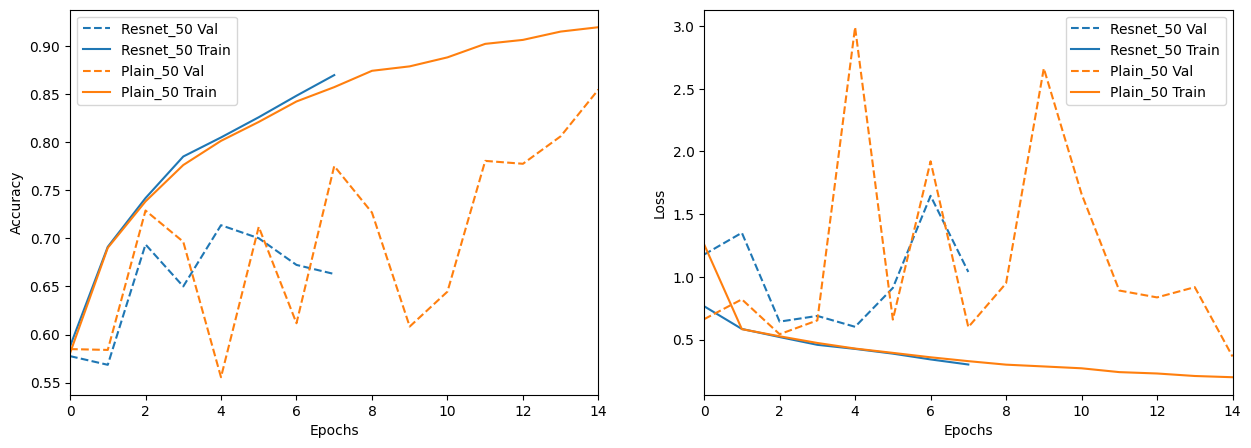

In [13]:
import matplotlib.pyplot as plt

def plot_history(histories, keys=('accuracy', 'loss')):
    plt.figure(figsize=(15, 5))

    for idx, key in enumerate(keys):
        plt.subplot(1, len(keys), idx + 1)

        for name, history in histories:
            val = plt.plot(history.epoch, history.history['val_' + key],
                           '--', label=name.title() + ' Val')
            plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                     label=name.title() + ' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        plt.xlim([0, max(history.epoch)])

plot_history([('resnet_50', history_resnet_50),
              ('plain_50', history_plainnet_50)])